# Project Goal: 
The goal is to predict which products will be in a user's next order.
We intend to achieve this through an exploratory analysis of the datasets. 

We will analyze data related to the type of users, products, and orders to create a baseline model. 

In [87]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()

%matplotlib inline

import os
os.getcwd()

'/Users/parinpatel/Documents/IST 652 .Scripting/FinalProject_Instacart'

In [88]:
IDIR = '.'
order_products_train_df = pd.read_csv("/Users/parinpatel/Documents/IST 652 .Scripting/FinalProject_Instacart/order_products__train.csv")
order_products_prior_df = pd.read_csv("/Users/parinpatel/Documents/IST 652 .Scripting/FinalProject_Instacart/order_products__prior.csv")
orders_df = pd.read_csv("/Users/parinpatel/Documents/IST 652 .Scripting/FinalProject_Instacart/orders.csv")
products_df = pd.read_csv("/Users/parinpatel/Documents/IST 652 .Scripting/FinalProject_Instacart/products.csv")
aisles_df = pd.read_csv("/Users/parinpatel/Documents/IST 652 .Scripting/FinalProject_Instacart/aisles.csv")
departments_df = pd.read_csv("/Users/parinpatel/Documents/IST 652 .Scripting/FinalProject_Instacart/departments.csv")

# Overview of Datasets
Includes determining their scale based on unique ids

In [89]:
orders_df.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


In [90]:
print("Unique users: {}".format(len(orders_df.user_id.unique())))

Unique users: 206209


In [91]:
print(orders_df.shape)

(3421083, 7)


The dataset contains 342,1083 orders from 206,209 different(unique) users. 
In all - 49,688 different products have been purchased.

In [92]:
orders_df[orders_df.user_id == 1]

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0
5,3367565,1,prior,6,2,7,19.0
6,550135,1,prior,7,1,9,20.0
7,3108588,1,prior,8,1,14,14.0
8,2295261,1,prior,9,1,16,0.0
9,2550362,1,prior,10,4,8,30.0


In [93]:
products_df.head()

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


In [94]:
print("Unique products: {}".format(len(products_df.product_id.unique())))

Unique products: 49688


The dataset contains 49688 unique products. 

In [95]:
order_products_train_df.head()

,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1


## Dive Into the Orders_df dataset:

   ### Counting the rows in the Orders_df  by the eval_set column for when the evaluation type 

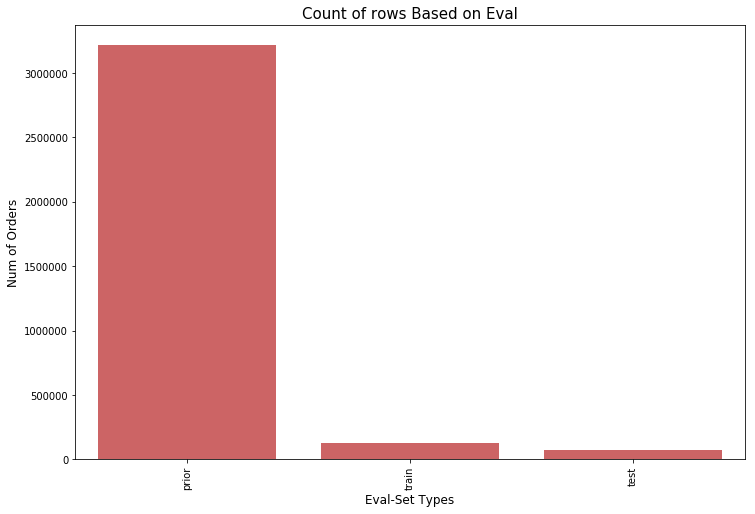

In [96]:
#Count Rows in  Orders_df  

evalSetcnt = orders_df.eval_set.value_counts()

plt.figure(figsize=(12,8))
sns.barplot(evalSetcnt.index, evalSetcnt.values, alpha=0.8, color=color[3])
plt.ylabel('Num of Orders', fontsize=12)
plt.xlabel('Eval-Set Types', fontsize=12)
plt.title('Count of rows Based on Eval', fontsize=15)
plt.xticks(rotation='vertical')
plt.show()

In [97]:
def get_unique_count(x):
    return len(np.unique(x))

evalSetcnt = orders_df.groupby("eval_set")["user_id"].aggregate(get_unique_count)
evalSetcnt

eval_set
prior    206209
test      75000
train    131209
Name: user_id, dtype: int64

In [98]:
orders_df['eval_set'].value_counts()

prior    3214874
train     131209
test       75000
Name: eval_set, dtype: int64

Out of the 206,209 users, the final latest purchases, which consists of 131,209 users are set as the training, and the remaining  75,000 users are set as targets for our prediction model.



# User Level Analysis:
   ## How many orders to each users approx have? 

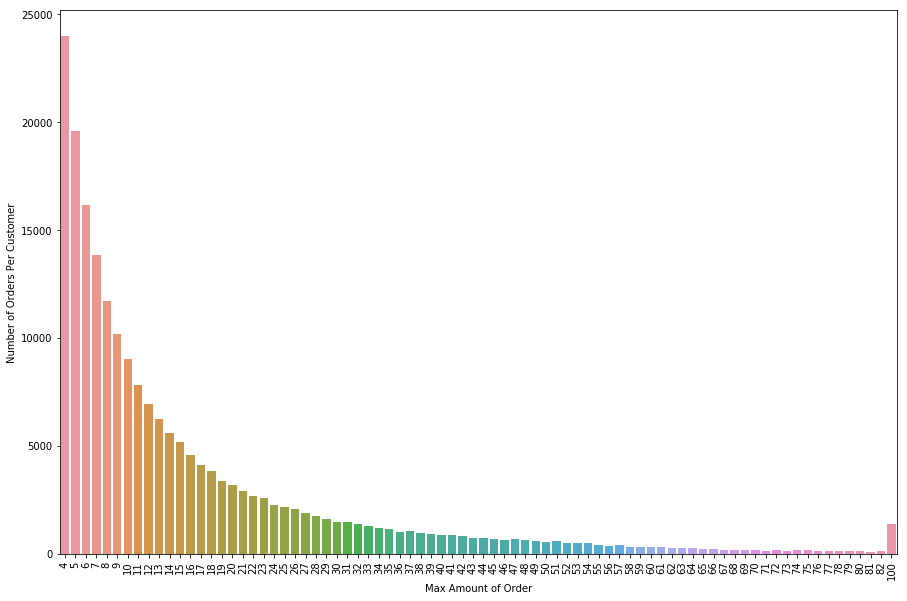

In [99]:
#eval set based on  order history 
order_his_cnt = orders_df.groupby("user_id")["order_number"].aggregate(max).value_counts()
cut_off = 80
f, ax = plt.subplots(figsize=(15, 10))
sns.barplot(order_his_cnt.index[:cut_off], order_his_cnt.values[:cut_off])
plt.ylabel('Number of Orders Per Customer')
plt.xlabel('Max Amount of Order')
plt.xticks(rotation='vertical')
plt.show()


In [100]:
print("Average number of orders for users:{}".format(orders_df.groupby("user_id")["order_number"].aggregate(max).mean()))

Average number of orders for users:16.590367054784224


Looked that the number of users in past orders dataset. There is a diminishing number of customers as the number of orders per customer increases. Additionally, there is a slight increase at 100 orders - which is the upper-limit in the dataset.

Average number of orders per user is 16.6. 

/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:3221: MatplotlibDeprecationWarning: 
The `xmax` argument was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use `right` instead.
  alternative='`right`', obj_type='argument')


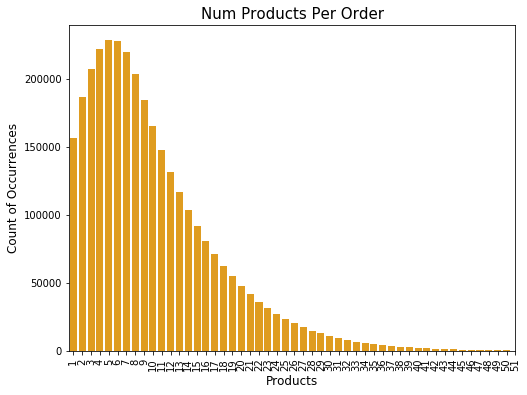

In [101]:
productsPerOrder = order_products_prior_df.groupby("order_id")["add_to_cart_order"].max().reset_index()
productsPerOrder = productsPerOrder['add_to_cart_order'].value_counts()

plt.figure(figsize=(8,6))
sns.barplot(productsPerOrder.index, productsPerOrder.values, color='orange')
plt.ylabel('Count of Occurrences', fontsize=12)
plt.xlabel('Products', fontsize=12)
plt.title('Num Products Per Order', fontsize=15)
plt.xlim(xmax=50)
plt.xticks(rotation='vertical')
plt.show()

In [102]:
print("Average order size is:{}".format(order_products_prior_df.groupby("order_id")["add_to_cart_order"].aggregate(max).mean()))

Average order size is:10.088883421247614


The mean number of products per order is 10.
The mode for the number of products per customer order is 5 while the median number of products 8. 


For this graph - I've capped these number of items per order at 51.

Note that although a handful of outlier orders contain more products. After peaking at 5-6 items, each order with products occured less frequently than orders with 5-6 products. 


Therefore, we can say that it is likely in the future we will see orders with about 5 products. 

## When are users ordering?  

In [103]:
def make_day(x):
    return {
        0:'Sunday',
        1:'Monday',
        2:'Tuesday',
        3:'Wednesday',
        4:'Thursday',
        5:'Friday'
    }.get(x, 'Saturday')

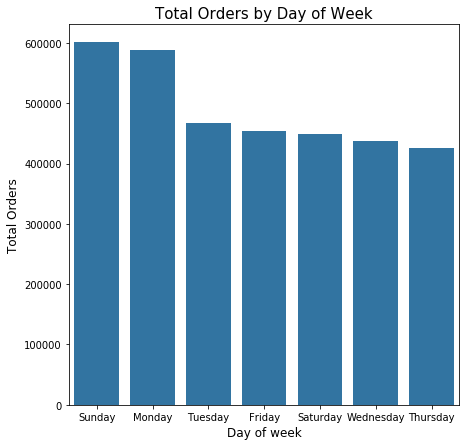

In [104]:
orders_df['order_dow'] = orders_df['order_dow'].map(make_day)
dow = orders_df.groupby('order_dow')[['order_id']].count().reset_index().sort_values('order_id',ascending=False)
plt.figure(figsize=(7,7))
sns.barplot(x='order_dow', y='order_id', data=dow, color=color[0])
plt.ylabel('Total Orders', fontsize=12)
plt.xlabel('Day of week', fontsize=12)
plt.title("Total Orders by Day of Week", fontsize=15)
plt.show()



0 = sunday 
1 = monday
2 = tuesday
3 = Wednesday
4 = Thursday
5 = friday
6 = Saturday 

Highest ordering on sunday followed by Monday. Overall, higher ordering counts in beginning of week. 

Orders are 30-40% more likely to occur on Sunday or Monday than another day of the week.


### Time of ordering during day  (Volume per day)

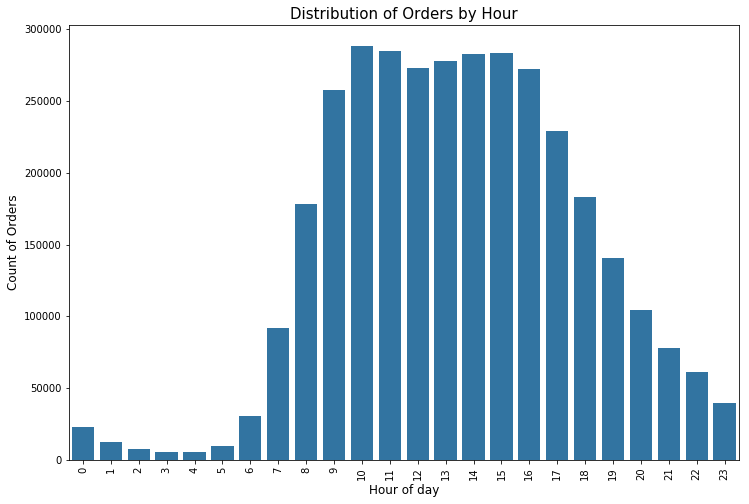

In [105]:
plt.figure(figsize=(12,8))
sns.countplot(x="order_hour_of_day", data=orders_df, color=color[0])
plt.ylabel('Count of Orders', fontsize=12)
plt.xlabel('Hour of day', fontsize=12)
plt.xticks(rotation='vertical')
plt.title("Distribution of Orders by Hour", fontsize=15)
plt.show()

Orders mostly were placed in the late morning and late afternoon. 

There is some early morning and late evening ordering. But, most ordering is concentrated around the middle of the day. 

In [106]:
orders_df.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,Tuesday,8,NaN
1,2398795,1,prior,2,Wednesday,7,15.0
2,473747,1,prior,3,Wednesday,12,21.0
3,2254736,1,prior,4,Thursday,7,29.0
4,431534,1,prior,5,Thursday,15,28.0


In [107]:
order_products_train_df = pd.merge(order_products_train_df, orders_df, on='order_id', how='left')
grouped_df = order_products_train_df.groupby(["order_dow", "order_hour_of_day"])["reordered"].aggregate("mean").reset_index()
grouped_df.head()

,order_dow,order_hour_of_day,reordered
0,Friday,0,0.524818
1,Friday,1,0.582648
2,Friday,2,0.518617
3,Friday,3,0.562005
4,Friday,4,0.631579


In [108]:
grouped_df = grouped_df.pivot(index='order_dow', columns = 'order_hour_of_day', values = 'reordered')
grouped_df.head()

order_hour_of_day,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
order_dow,,,,,,,,,,,,,,,,,,,,,
Friday,0.524818,0.582648,0.518617,0.562005,0.631579,0.610675,0.615789,0.639612,0.638711,0.631389,...,0.604482,0.596998,0.618176,0.596956,0.587063,0.589160,0.621550,0.588651,0.603620,0.593590
Monday,0.622407,0.550877,0.511111,0.664921,0.626016,0.597846,0.664765,0.656859,0.654519,0.642871,...,0.598679,0.570853,0.576848,0.572953,0.573926,0.603978,0.546328,0.602629,0.574086,0.586061
Saturday,0.548270,0.613260,0.645455,0.619266,0.607629,0.614907,0.632563,0.657087,0.632832,0.615684,...,0.577603,0.569084,0.589777,0.592307,0.593773,0.577114,0.604114,0.618027,0.643312,0.594640
Sunday,0.577806,0.587189,0.593341,0.553435,0.599455,0.607201,0.653686,0.677985,0.665738,0.635068,...,0.598129,0.591321,0.601673,0.614780,0.587774,0.609967,0.622931,0.641041,0.624711,0.605878
Thursday,0.530852,0.575233,0.540659,0.593985,0.617761,0.666062,0.683973,0.635435,0.631235,0.592284,...,0.591776,0.593674,0.588828,0.606985,0.589294,0.594579,0.587502,0.609812,0.592511,0.591469


In [109]:
grouped_df = grouped_df.reindex(["Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"])

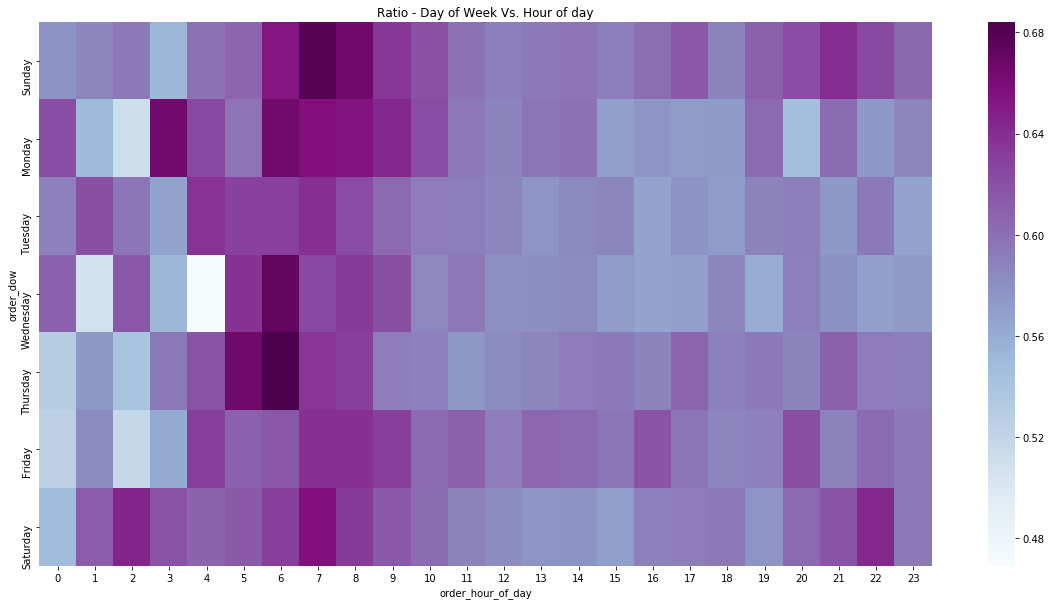

In [110]:
plt.figure(figsize=(20,10))
sns.heatmap(grouped_df, cmap="BuPu")
plt.title("Ratio - Day of Week Vs. Hour of day")
plt.show()


Overall you see the heaviest ordering levels around the middle of the day everyday. However, on Sunday you see ordering later in the mid-day after 12 pm. On Monday, it tends to be heaviest before noon. 


This heat map is interesting but we have to be careful because it can be misleading. The dates and order volumei is incomparable.And because these are ratios for orders within that individual day. 

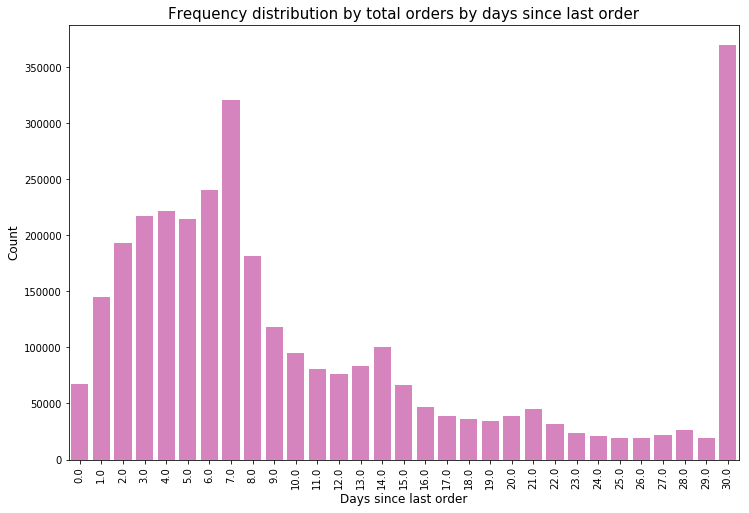

In [111]:
plt.figure(figsize=(12,8))
sns.countplot(x="days_since_prior_order", data=orders_df, color=color[6])
plt.ylabel('Count', fontsize=12)
plt.xlabel('Days since last order', fontsize=12)
plt.xticks(rotation='vertical')
plt.title("Frequency distribution by total orders by days since last order", fontsize=15)
plt.show()

Overall, around half of customer placed another order after about a week of their last order. 

The volume of orders generall increases the days after a customer has made an order until they are ordering for the next week (so most customers were found to order within 1-7 days of their last order). However, there is a strong decline after 7 days. Meaning less customers order after 7 days (less people bi-weekly shop). 

The high volume of re-orders was 30 days. This is likely due to an error meaning "30 or more days". Meaning there will likely be some customers who order from Instacart after a month.  


Looks like customers order once in every week (check the peak at 7 days)  We could also see smaller spikes at 14, 21 and 28 days.


In [112]:
# % of re-orders in prior set #
order_products_prior_df.reordered.sum() / order_products_prior_df.shape[0]

0.5896974667922161

In [113]:
# percentage of re-orders in train set #
order_products_train_df.reordered.sum() / order_products_train_df.shape[0]

0.5985944127509629

On an average, about 59% of the products in an order are re-ordered products.

In [114]:
duplicates = order_products_prior_df.groupby(['order_id','product_id'])[['product_id']].count()
duplicates.columns = ['count']
duplicates = duplicates.reset_index()
print('Count number of instances item has quantity > 1 : ' + str(len(duplicates[duplicates['count']>1])))

Count number of instances item has quantity > 1 : 0


# Product Level Analysis 
What products are the most popular? 

In [115]:
products_df.head()

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


In [116]:
aisles_df.head()

,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation


In [117]:
departments_df.head()

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


#Preprocessing Step: Merge product details with order_prior details

In [ ]:
ordered_productsP_merge = pd.merge(order_products_prior_df, products_df, on='product_id', how='left')
ordered_productsP_merge = pd.merge(order_products_prior_df, aisles_df, on='aisle_id', how='left')
ordered_productsP_merge = pd.merge(order_products_prior_df, departments_df, on='depaartment_id', how='left')

ordered_productsP_merge.head()

In [ ]:
##By Department
dept_pop = ordered_productsP_merge['department_y'].value_counts().head(5)
plt.figure(figsize=(8,6))
ax = sns.barplot(dept_pop.index, dept_pop.values, color=color[4])
plt.ticklabel_format(style='plain', axis='y', scilimits=(0,0))
plt.ylabel('Products Sold', fontsize=12)
plt.xlabel('Departments', fontsize=12)
plt.title('Products Sold- Arranged by Most Popular Department', fontsize=15)
plt.show()

More than 29% of products sold by Instacart in the dataset originate in the produce department, a striking number. 

Though produce dominates sales, the dairy, snacks, beverages, and frozen foods departments also account for at least 2 million items of 32 million items sold.

In [ ]:
dept_lowpop = ordered_productsP_merge['department_y'].value_counts().tail(4)
plt.figure(figsize=(8,6))
sns.barplot(dept_lowpop.index, dept_lowpop.values, color=color[4])
plt.ylabel('Products Sold', fontsize=12)
plt.xlabel('Departments', fontsize=12)
plt.title('Products Sold- Arranged by Least Popular Department', fontsize=15)
plt.show()

Instacart customers far less frequently order pet and bulk products with the service, those departments accounting for roughly 100,000 and 40,000 sales, respectively.

In [ ]:
aisle_pop = ordered_productsP_merge['aisle'].value_counts().head(5)
plt.figure(figsize=(8,6))
sns.barplot(aisle_pop.index, aisle_pop.values, alpha=0.8)
plt.ylabel('Num of Orders', fontsize=12)
plt.xlabel('Aisle Types', fontsize=12)
plt.title('Products Sold- Arranged by Most Popular Asile', fontsize=15)
plt.xticks(rotation='vertical')
plt.show()

As one would expect from the highest volume departments, the aisles selling the most items are located in the produce and dairy departments, respectively.

**Pre-Processing**: Group product id's with count of how much that item has been ordered. 

Using association methods - individual products were plotted by sales. 
Each dot represents sales volume for a unique product in the 7 instacart departments with the highest sales volume.

Number of orders capped at 100,000 for each product. Note that most products have order #'s higher than 100K. 

In [ ]:
pop_orders = pd.merge(ordered_productsP_merge, orders_df, on='order_id', how='inner')
prod_orders = pop_orders.groupby('product_id')[['order_id']].count().reset_index()
prod_orders.columns = ['product_id','prod_orders']
prod_orders = pd.merge(prod_orders, products_df, on='product_id', how='inner')
prod_orders = pd.merge(prod_orders, departments_df, on='department_id', how='inner')
prod_orders.head(1)

In [ ]:
plt.figure(figsize=(8,8))
dept_list = ['dairy eggs', 'snacks', 'beverages', 'frozen', 'pantry','bakery','produce']
mask = prod_orders['department'].isin(dept_list)
ax = sns.stripplot(x="department", y="prod_orders", data=prod_orders[mask],jitter=True)
ax.set(xlabel='Department', ylabel='Product Orders',title='Products  By Department')
plt.ylim(ymin=0)
plt.ylim(ymax=50000)
plt.show()

In [ ]:
pop_top_products = ordered_productsP_merge['product_name'].value_counts().reset_index().head(20)
pop_top_products.columns = ['product_name', 'frequency_count']
pop_top_products

In [ ]:
most_ordered = prod_orders[['product_name','prod_orders']].sort_values('prod_orders',ascending=False).head(15)
ax = sns.barplot(y='product_name',x='prod_orders',data=most_ordered, color='navy')
ax.set(xlabel='All Orders', ylabel='Products',title='Most Popular Products')
plt.show()

In [ ]:
pop_top_products = ordered_productsP_merge['aisle'].value_counts().head(20)
plt.figure(figsize=(12,8))
sns.barplot(pop_top_products.index, pop_top_products.values, alpha=0.8, color=color[5])
plt.ylabel('Count of Orders Containing This Product', fontsize=14)
plt.xlabel('Aisle', fontsize=14)
plt.xticks(rotation='vertical')
plt.show()

The most frequently ordered products: bananas, bananas, bananas. 

The two best selling banana products have, combined, been ordered ~850,000 times in the dataset. 

A variety of organic fruits and vegetables follow, ‘organic’ hinting that Instacart customers skew affluent. 


Organic whole milk is the lone non-produce product in the top 15 most ordered items. 


As a whole, fruits sell slightly more than vegetables, but that wouldn’t be so if avocado, for example, were reclassified as a vegetable.